# COMPRENSIÓN Y ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En este notebook se realiza un análisis exploratorio de la base de datos
con el fin de comprender su estructura, calidad, tipos de variables
y posibles relaciones entre ellas, como etapa previa al modelado.

El objetivo es identificar patrones, problemas de calidad de datos
y posibles transformaciones que serán necesarias en etapas posteriores
del proyecto.

# IMPORTS Y CARGA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../data/raw/Base_de_datos.xlsx")

# EXPLORACIÓN INICIAL

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [3]:
df.describe(include="all")

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,10763,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,...,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,7831,10763.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN
top,NaN,NaN,NaN,NaN,NaN,Empleado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creciente,NaN
freq,NaN,NaN,NaN,NaN,NaN,6754,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5294,NaN
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,NaN,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,...,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,NaN,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,NaN,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,NaN,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,...,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,NaN,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,NaN,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,...,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,NaN,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,NaN,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,...,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,NaN,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,NaN,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,...,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,NaN,1.000000


In [4]:
df.isnull().sum()

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64

# MARKDOWN (CARACTERIZACIÓN DE VARIABLES)

### Caracterización de las variables

El dataset contiene los siguientes tipos de variables:

- **Variable temporal**: `fecha_prestamo`
- **Variables categóricas**: `tipo_credito`, `tipo_laboral`, `tendencia_ingresos`
- **Variables numéricas**: variables relacionadas con montos, saldos,
  edad, puntajes y cantidades de créditos.
- **Variable objetivo**: `Pago_atiempo`, la cual representa el comportamiento
  de pago del cliente y será utilizada como target en etapas posteriores.

La mayoría de las variables corresponden a información financiera y de
comportamiento crediticio, típicas de un problema de clasificación de riesgo.

# CONVERSIÓN DE TIPOS

In [5]:
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"], errors="coerce")

categoricas = [
    "tipo_credito",
    "tipo_laboral",
    "tendencia_ingresos",
    "Pago_atiempo"
]

for col in categoricas:
    df[col] = df[col].astype("category")

In [6]:
df.dtypes

tipo_credito                           category
fecha_prestamo                   datetime64[ns]
capital_prestado                        float64
plazo_meses                               int64
edad_cliente                              int64
tipo_laboral                           category
salario_cliente                           int64
total_otros_prestamos                     int64
cuota_pactada                             int64
puntaje                                 float64
puntaje_datacredito                     float64
cant_creditosvigentes                     int64
huella_consulta                           int64
saldo_mora                              float64
saldo_total                             float64
saldo_principal                         float64
saldo_mora_codeudor                     float64
creditos_sectorFinanciero                 int64
creditos_sectorCooperativo                int64
creditos_sectorReal                       int64
promedio_ingresos_datacredito           

# UNIFICACIÓN DE NULOS

In [7]:
df = df.replace(["NA", "N/A", "", "null", "None"], np.nan)
df.isnull().sum().sort_values(ascending=False)

tendencia_ingresos               2932
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64

# MARKDOWN (VARIABLES IRRELEVANTES)

### Variables irrelevantes

En esta etapa no se eliminan variables del dataset, ya que todas las columnas
parecen aportar información potencialmente relevante para el análisis de
riesgo crediticio.

La eliminación o selección de variables se evaluará posteriormente,
considerando criterios como redundancia, correlación y capacidad predictiva.


# EDA UNIVARIABLE (NUMÉRICAS)

In [8]:
df.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito
count,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03
mean,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06
min,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05
50%,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06
75%,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06
max,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07
std,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06


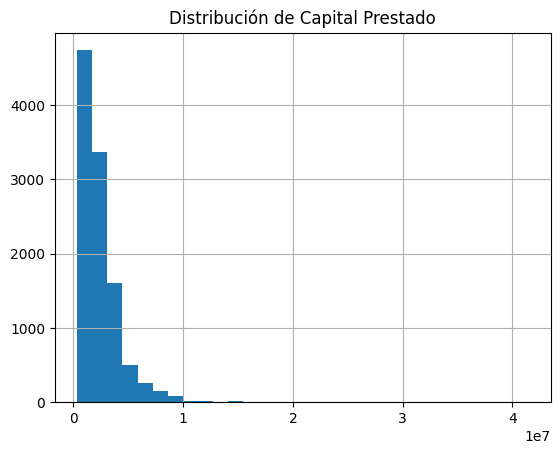

In [9]:
df["capital_prestado"].hist(bins=30)
plt.title("Distribución de Capital Prestado")
plt.show()

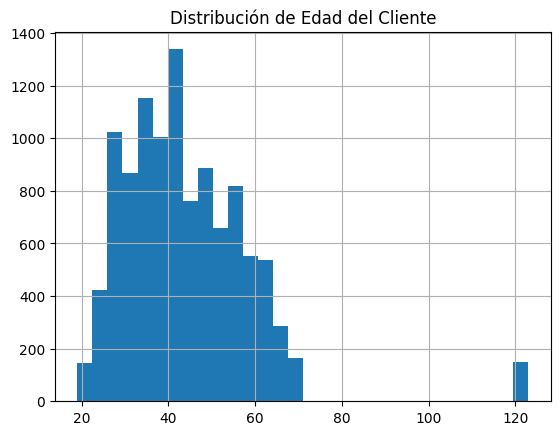

In [10]:
df["edad_cliente"].hist(bins=30)
plt.title("Distribución de Edad del Cliente")
plt.show()

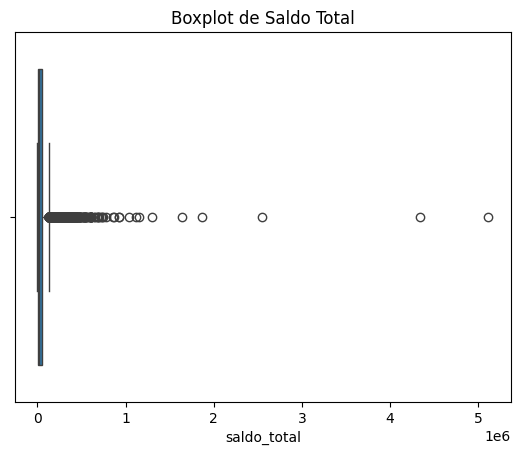

In [11]:
sns.boxplot(x=df["saldo_total"])
plt.title("Boxplot de Saldo Total")
plt.show()

# MARKDOWN (ANÁLISIS UNIVARIABLE)

Las variables monetarias presentan distribuciones asimétricas y presencia
de valores extremos, lo cual es común en datos financieros.
Estos comportamientos sugieren la necesidad de evaluar tratamiento de
outliers y posibles transformaciones en etapas posteriores.

# EDA UNIVARIABLE (CATEGÓRICAS)

In [12]:
df["tipo_credito"].value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64

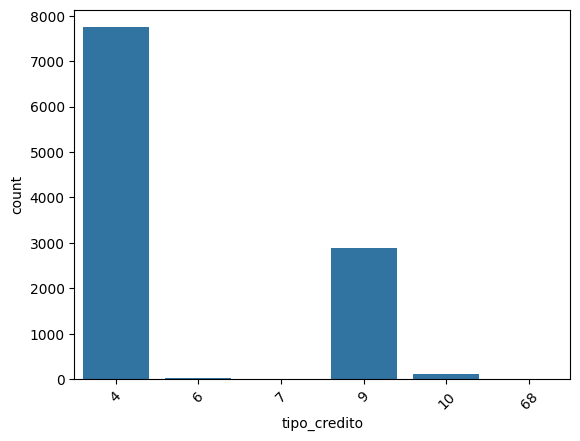

In [13]:
sns.countplot(x="tipo_credito", data=df)
plt.xticks(rotation=45)
plt.show()

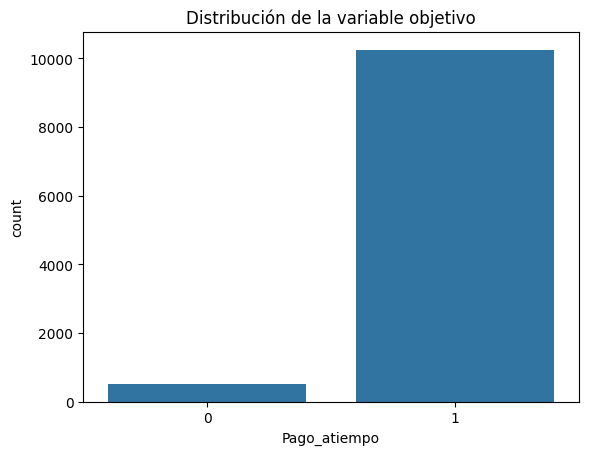

In [14]:
sns.countplot(x="Pago_atiempo", data=df)
plt.title("Distribución de la variable objetivo")
plt.show()

# MARKDOWN (TARGET)

La variable objetivo `Pago_atiempo` presenta una posible desbalance de clases,
lo cual debe ser considerado en el proceso de modelado para evitar sesgos
en la predicción.

# EDA BIVARIABLE

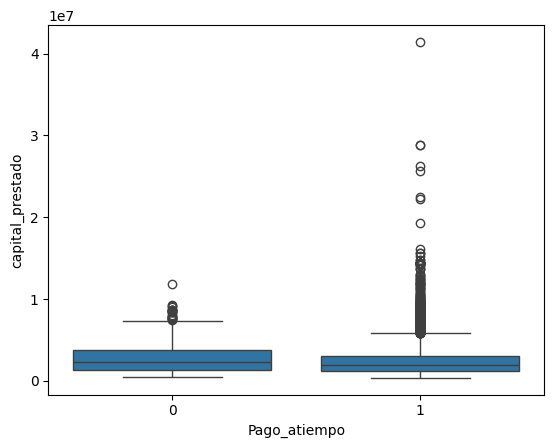

In [15]:
sns.boxplot(x="Pago_atiempo", y="capital_prestado", data=df)
plt.show()

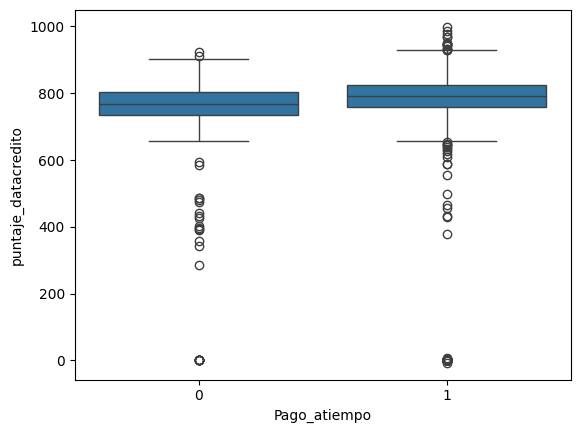

In [16]:
sns.boxplot(x="Pago_atiempo", y="puntaje_datacredito", data=df)
plt.show()

In [17]:
pd.crosstab(df["tipo_credito"], df["Pago_atiempo"], normalize="index")

Pago_atiempo,0,1
tipo_credito,,
4,0.046857,0.953143
6,0.428571,0.571429
7,0.000000,1.000000
9,0.047288,0.952712
10,0.025862,0.974138
68,0.000000,1.000000


# MARKDOWN (BIVARIABLE)

Se observan diferencias en la distribución de variables financieras y de
puntaje crediticio según el comportamiento de pago, lo cual sugiere
capacidad predictiva de estas variables frente a la variable objetivo.

# EDA MULTIVARIABLE

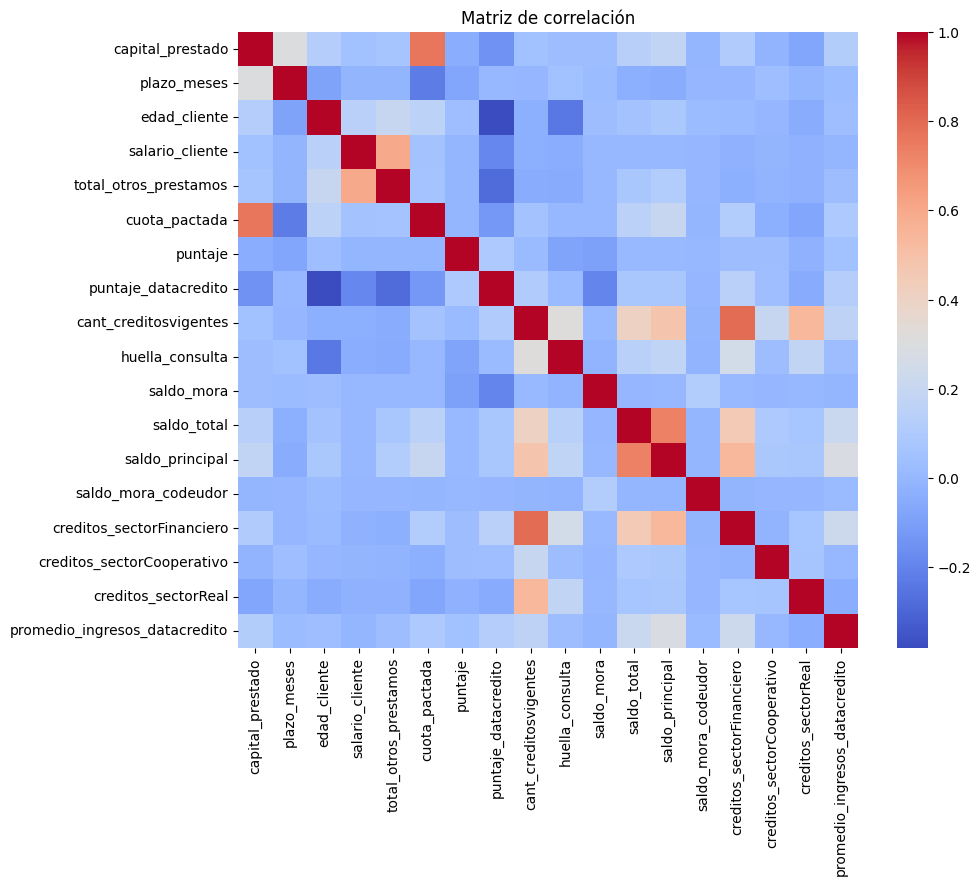

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.select_dtypes(include="number").corr(),
    cmap="coolwarm"
)
plt.title("Matriz de correlación")
plt.show()

# MARKDOWN (CONCLUSIONES DEL EDA)

### Conclusiones del Análisis Exploratorio

El dataset presenta una estructura adecuada para un problema de clasificación
binaria orientado a la predicción del comportamiento de pago de clientes.

Se identifican variables financieras, de saldo y de puntaje crediticio con
potencial capacidad predictiva sobre la variable `Pago_atiempo`.

Asimismo, se detectan:
- Presencia de valores extremos en variables monetarias.
- Posible desbalance de clases en la variable objetivo.
- Correlaciones altas entre variables relacionadas con montos y saldos,
  lo que sugiere redundancia y posible colinealidad.

En etapas posteriores se recomienda aplicar técnicas de escalamiento,
codificación de variables categóricas, tratamiento de outliers y selección
de características antes del modelado.